# Assignment: Benchmarking Neural Nets with the XOR Problem

### DS 6050 - School of Data Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 70 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_1_ann.ipynb**.



In [15]:
# You might want to use the following packages
import numpy as np
import os
%tensorflow_version 2.x
import tensorflow as tf

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the `train / validate / test` sets. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


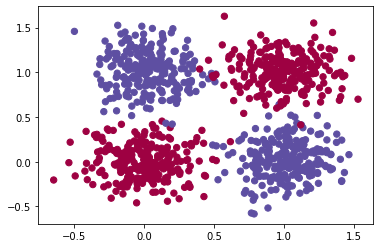

In [16]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49) 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)


---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [17]:
X_train.shape

(720, 2)

In [18]:
import tensorflow as tf
from tensorflow import keras

my_model = keras.Sequential()
# Your code here!
## Input Layer
my_model.add(keras.layers.Dense(10,input_shape=(2,))) ## Input layer 
my_model.add(keras.layers.Activation('tanh')) # Add activation layer = tanh

## Hidden Layer
my_model.add(keras.layers.Dense(1))
my_model.add(keras.layers.Activation('sigmoid')) ## activation final sigmoid

my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [19]:
## Optimizer with learning are as 1e-3 for SGD
optimizer = keras.optimizers.SGD(learning_rate=1e-3)

In [20]:
## Training the model
my_model.compile(loss='binary_crossentropy', optimizer=optimizer)
my_model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 0.6938 - val_loss: 0.7206
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6938 - val_loss: 0.7205
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6937 - val_loss: 0.7202
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6936 - val_loss: 0.7200
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6935 - val_loss: 0.7198
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6935 - val_loss: 0.7197
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6934 - val_loss: 0.7195
Epoch 8/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6933 - val_loss: 0.7193
Epoch 9/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6933 - val_loss: 0.7191
Epoch 10/100
23/23 [==============================] - 0s 3ms/step - loss: 0.6932 - val_loss: 0.7189
Epoch 11/

In [21]:
print("Accuracy on test set: {}".format(my_model.evaluate(x=X_test, y=y_test)))

7/7 [==============================] - 0s 3ms/step - loss: 0.7018
Accuracy on test set: 0.7018260955810547


- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [22]:
from sklearn.base import BaseEstimator
from sklearn.preprocessing import OneHotEncoder

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, n0, n1, n2, alpha=0.01):
        """
        @param: n0: Number of nodes in the input layer
        @param: n1: Number of nodes in the hidden layer
        @param: n2: Number of nodes in the output layer
        @param: alpha: The Learning Rate
        """

        # SUBTASK 1: Initialize the parameters to random values.
        np.random.seed(42)
        self.W1 = np.random.rand(n1, n0)
        self.b1 = np.random.rand(n1, 1)
        self.W2 = np.random.rand(n2, n1)
        self.b2 = np.random.rand(n2, 1) 

        # Configure the learning rate
        self.alpha = alpha
        # One-hot encoder for labels
        self.encoder = OneHotEncoder(sparse=False)
        
    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: A1: saved value of the output of the hidden layer
        @return: A2: activated return value of the output layer.
        """
        # SUBTASK 2: Implement Forward propagation.
        # Note: that you must implement tanh activation for the hiden layer 
        # and softmax for the output layer
        
        Z1 = np.dot(self.W1, X) + self.b1
        A1 = np.tanh(Z1)
        Z2 = np.dot(self.W2, A1) + self.b2
        A2 = np.exp(Z2)/ np.sum(np.exp(Z2), axis=1, keepdims=True)
        
        return A1, A2 


    def loss(self, X, y):
        """
        Evaluate the total loss on the dataset
        @param: X: features
        @param: y: labels
        @return: L: the loss value
        """
        

        # SUBTASK 3: Calculate the loss using Cross-Entropy
        # You will need to return the average loss on the data
        # Hint: Use A2 to calculate the loss
        A1, A2 = self.forward_pass(X)  
        # Another Hint: First, you may want to convert the lable y into a one-hot vector
        Y = self.one_hot(y)
        m = y.shape[0]
        L = (1.0/m)*np.sum(-y*np.log(A2)-(1-y) * np.log(1-A2))

        return L

    def backward_pass(self, A1, A2, X, y):
        """
        @param: X: feature
        @param: y: label
        @param: A1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the loss gradient of W1
        @return: db1: the loss gradient of b1
        @return: dW2: the loss gradient of W2
        @return: db2: the loss gradient of b2
        """

        # You DO NOT CHANGE this function, ...
        # unless you are advanced and want to use different activation function for your forward pass
        # This is an elegant partial derivative of cross entropy with softmax
        # Ref document: https://deepnotes.io/softmax-crossentropy
        m   = y.shape[0]
        dZ2 = A2 - self.one_hot(y) 
        dW2 = np.dot(dZ2, A1.T)/m
        db2 = np.sum(dZ2, axis=1, keepdims=True)/m
        dZ1 = np.multiply( np.dot( self.W2.T, dZ2), 1-np.power( A1, 2))
        dW1 = np.dot(dZ1, X.T)/m
        db1 = np.sum(dZ1, axis=1, keepdims=True)/m

        return dW1, db1, dW2, db2


    def fit(self, X, y , epochs, X_val, Y_val):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Input checks: X and X_val needs to be in the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        if (X_val.shape[0] > X_val.shape[1]): X_val = X_val.T

        # Gradient descent
        for i in range(0, epochs):
            
            # SUBTASK 4: Compute the forward, backward, and gradient descent parameter update
            # Step 1: Forward pass
            A1, A2 = self.forward_pass(X)
            
            # Step 2: Backward pass
            dW1, db1, dW2, db2 = self.backward_pass(A1, A2, X, y)

            # Step 3: Gradient Descent 
            self.W1 = self.W1 - self.alpha * dW1
            self.b1 = self.b1 - self.alpha * db1
            self.W2 = self.W2 - self.alpha * dW2
            self.b2 = self.b2 - self.alpha * db2

            # Print the loss and validation accuracy every 10 epochs.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_accuracy: %f" 
                      %(i,epochs, self.loss(X, y), self.evaluate(X, y),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))

    def predict(self, X):
        """
        Predict label vector y
        """
        # check X for the form of n0 x m
        if (X.shape[0] > X.shape[1]): X = X.T
        
        # SUBTASK 5: Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        A1, A2 = self.forward_pass(X)
        y_hat = np.argmax(A2, axis=0)

        return y_hat


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        m = y.shape[0]
        y_hat = self.predict(X)
        correct_y = (y_hat == y).astype(int)

        return sum(correct_y)/m


    def one_hot(self, y):
        """
        Utility function: Convert a label vector to one-hot vector
        """
        Y = self.encoder.fit_transform(y.reshape(len(y),1))  
        return Y.T # Transpose to get into same shape 1 x m


    def plot_decision_boundary(self, X, y):
        """
        Utility Function: Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
        y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        data_grid= np.c_[xx.ravel(), yy.ravel()]
        Z = self.predict(data_grid)
        Z = Z.reshape(xx.shape)

        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral)        

---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version. 

Epoch 0/100 - loss: 6.366000 - accuracy: 0.370833 - val_loss: 5.150025 - val_accuracy: 0.487500
Epoch 10/100 - loss: 6.357933 - accuracy: 0.508333 - val_loss: 5.152983 - val_accuracy: 0.550000
Epoch 20/100 - loss: 6.344611 - accuracy: 0.513889 - val_loss: 5.142709 - val_accuracy: 0.537500
Epoch 30/100 - loss: 6.332145 - accuracy: 0.547222 - val_loss: 5.128563 - val_accuracy: 0.550000
Epoch 40/100 - loss: 6.325436 - accuracy: 0.580556 - val_loss: 5.118541 - val_accuracy: 0.587500
Epoch 50/100 - loss: 6.323384 - accuracy: 0.590278 - val_loss: 5.113008 - val_accuracy: 0.575000
Epoch 60/100 - loss: 6.324055 - accuracy: 0.570833 - val_loss: 5.110527 - val_accuracy: 0.550000
Epoch 70/100 - loss: 6.326122 - accuracy: 0.522222 - val_loss: 5.109879 - val_accuracy: 0.525000
Epoch 80/100 - loss: 6.328828 - accuracy: 0.422222 - val_loss: 5.110280 - val_accuracy: 0.500000
Epoch 90/100 - loss: 6.331761 - accuracy: 0.563889 - val_loss: 5.111264 - val_accuracy: 0.625000
Accuracy on the test set is  0.

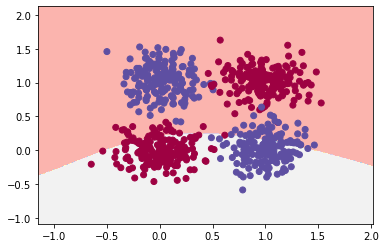

In [23]:
# MODEL 1 here
n0 = 2 # input layer dimensionality
n1 = 4 # hiden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.1 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/100 - loss: 6.827686 - accuracy: 0.493056 - val_loss: 5.684315 - val_accuracy: 0.562500
Epoch 10/100 - loss: 6.813238 - accuracy: 0.444444 - val_loss: 5.661767 - val_accuracy: 0.562500
Epoch 20/100 - loss: 6.691277 - accuracy: 0.597222 - val_loss: 5.529586 - val_accuracy: 0.625000
Epoch 30/100 - loss: 6.566201 - accuracy: 0.625000 - val_loss: 5.395824 - val_accuracy: 0.625000
Epoch 40/100 - loss: 6.473097 - accuracy: 0.823611 - val_loss: 5.296811 - val_accuracy: 0.775000
Epoch 50/100 - loss: 6.410601 - accuracy: 0.925000 - val_loss: 5.230330 - val_accuracy: 0.925000
Epoch 60/100 - loss: 6.369473 - accuracy: 0.786111 - val_loss: 5.186193 - val_accuracy: 0.787500
Epoch 70/100 - loss: 6.342258 - accuracy: 0.669444 - val_loss: 5.156423 - val_accuracy: 0.675000
Epoch 80/100 - loss: 6.324089 - accuracy: 0.620833 - val_loss: 5.135927 - val_accuracy: 0.650000
Epoch 90/100 - loss: 6.311907 - accuracy: 0.593056 - val_loss: 5.121555 - val_accuracy: 0.625000
Accuracy on the test set is  0.

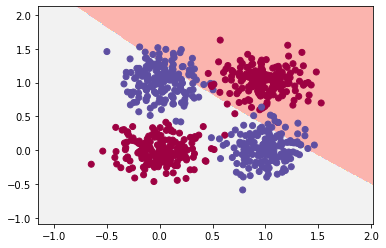

In [24]:
# MODEL 2 here
n0 = 2 # input layer dimensionality
n1 = 16 # hiden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.1 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)


Epoch 0/100 - loss: 10.455368 - accuracy: 0.437500 - val_loss: 10.007109 - val_accuracy: 0.325000
Epoch 10/100 - loss: 10.380955 - accuracy: 0.418056 - val_loss: 9.893498 - val_accuracy: 0.337500
Epoch 20/100 - loss: 9.547872 - accuracy: 0.386111 - val_loss: 8.874453 - val_accuracy: 0.312500
Epoch 30/100 - loss: 8.721458 - accuracy: 0.341667 - val_loss: 7.876406 - val_accuracy: 0.275000
Epoch 40/100 - loss: 8.103253 - accuracy: 0.300000 - val_loss: 7.141412 - val_accuracy: 0.250000
Epoch 50/100 - loss: 7.669862 - accuracy: 0.301389 - val_loss: 6.634851 - val_accuracy: 0.237500
Epoch 60/100 - loss: 7.364962 - accuracy: 0.437500 - val_loss: 6.284214 - val_accuracy: 0.375000
Epoch 70/100 - loss: 7.145384 - accuracy: 0.920833 - val_loss: 6.035351 - val_accuracy: 0.900000
Epoch 80/100 - loss: 6.982910 - accuracy: 0.804167 - val_loss: 5.853542 - val_accuracy: 0.862500
Epoch 90/100 - loss: 6.859567 - accuracy: 0.713889 - val_loss: 5.717041 - val_accuracy: 0.762500
Accuracy on the test set is 

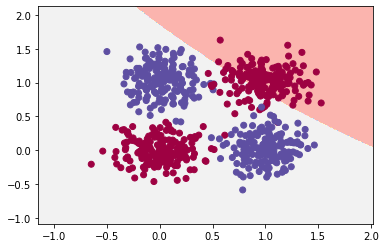

In [25]:
# MODEL 3 here
n0 = 2 # input layer dimensionality
n1 = 64 # hiden layer dimensionality
n2 = 2 # output layer dimensionality
alpha = 0.1 # learning rate for gradient descent
epochs = 100 # number of iteration/epochs

# Build a model with 3 layers
myModel1 = MyNeuralNet(n0, n1, n2, alpha);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)
print("Accuracy on the test set is ", myModel1.evaluate(X_test, y_test))

# Plot the decision boundary
myModel1.plot_decision_boundary(X_train, y_train)

In [26]:
# COMPARISONS OF THESE MODELS WITH THE STANDARD LIBRARY MODEL IN TASK 2

From the three models the only difference was the number of of nodes in the hidden layer. For model 1, 4 nodes were used, model 2, 16 nodes, and for model 3 there were 64 nodes. The learning rate and number of iterations were kept the same to see how the number of nodes in the hidden layer would affect the test error. The testing error would decrease with the increased number of hidden layers when all other aspects were kept constant. However, depending on the run the accuracy would differ. Out of curiousity, a model was constructed (not shown in this report) with a very high node count for the hidden layer, but interestingly enough, it reached a certain point of accuracy. Before getting a run time exception, the accuracy with an increase of nodes in the hidden layer would plateau at around 0.7, which was similar to the third model constrcuted. Therefore, to get even better results it may be better to look at making changes to the learning rate or epochs for the model constructed since increasing the number of nodes in the hidden layer would plateau.

## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

1. How did your own network perform?

- I would like to believe that the model that I constructed worked well give that the third model had an accruacy of around 0.7. Although it wasn't comparable to the best models created somewhere by some people with ridcicoulsy high accuracy, I think given the circumstances and trying it for different datasets will be scalable.

2. Is there any major differences betweeen the implementations?

- Since creating my own network had all the activation and implementation within the class I think customization became a limitation. For keras, there were many aspects were an argument could be placed to create more models, but since my impelmentation was wrapped within one class with limited arguments it would be hard to customize the network.

3. Reflecting on your experience implementing a learning algorithm for this assignment.

- After implementing my own network for this assignment, my respect for package creaters for networks has greatly increased. While implementing I was faced with frustration, happniess, and confusion. To make a package that is widely accepted must have been extremely difficulty and much hard work must have been devoted. For me personally, it was hard. Considering that I don't have much expertise and am still learning to translate that into code was very hard. On the bright side, it made me become more humble to learn about the area. 



---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lecture slides on Module 2
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <soa2wg@virginia.edu> with subject starting "DS 6050 Assignment 1:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!